<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br>
<font size='6'>Intro to Seaborn</font>
<br>
<em><font size='3'>Boston Python</font></em>

> _by: Jack Daoud_
>
> _Jan 19<sup>th</sup>, 2022_


<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br><br><br>

# Table of Contents

<br>

> <b><font size='3.5 '>Section 01: Overview of Matplotlib Figure & Axes</font></b>
> 
> <b><font size='3.5 '>Section 02: Seaborn Fundamentals</font></b>
> 
> <b><font size='3.5 '>Section 03: Different Axes Plots</font></b>
> 
> <b><font size='3.5 '>Section 04: Aesthetic Customizations</font></b>

<br><br>

# Section 01: Overview of Matplotlib Figure & Axes

### Getting Started

* Install matplotlib, seaborn
* pip install seaborn matplotlib
* conda install seaborn matplotlib
* conda update seaborn
* pip install -U seaborn

In [1]:
import matplotlib
matplotlib.__version__

'3.5.0'

In [2]:
import seaborn as sns
sns.__version__

'0.11.2'

### Matplotlib Figure & Axes Review

* Figure contains one or more axes
* Axes ("Axeeez") - a single plot within a figure
* `plt.subplots` creates a figure and one or more axes
    * Set first two arguments to number of rows and columns of Axes
    * `figsize` - tuple of width, height of Axes in in inches
    * `dpi` - dots per inch - set to monitor dpi to get matplotlib inches to equal screen inches
    * `facecolor` - background color
    * `tight_layout` - boolean for nice spacing
    * `plt.subplots(2, 3, figsize=(7, 4), dpi=147, facecolor='tan', tight_layout=True)`
    * Returns a two-item tuple, where first item is a Figure. Second item is
        * Axes if 1x1
        * Numpy array of Axes if anything else

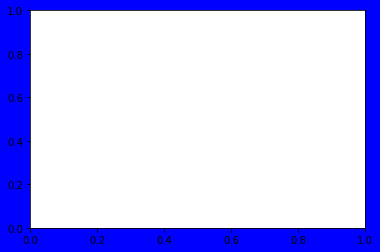

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(facecolor='blue')

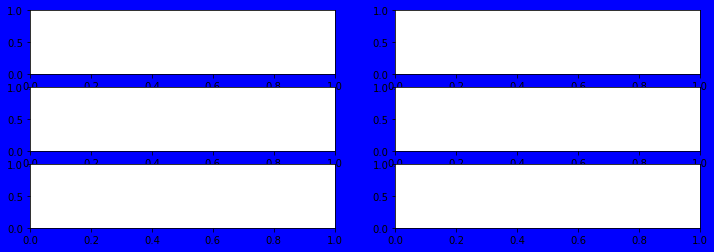

In [4]:
fig, axs = plt.subplots(3, 2, facecolor='blue', figsize=(12, 4))

<br><br>

# Section 02: Seaborn Fundamentals

The [Seaborn API][1] and [User Guide][2] are your best friends; it'll help if you have them open throughout the demo.

[1]: http://seaborn.pydata.org/api.html
[2]: https://seaborn.pydata.org/tutorial.html

<br> 

## Theory

### Part 01: Axes vs Grid Plots

All of the seaborn plotting functions return either a matplotlib axes or a seaborn grid (wrapper around a figure).

* A Grid is a matplotlib Figure containing one or more Axes
    * rows and columns of plots
* Only a few Seaborn plotting functions create Grids
    * `relplot` - creates grids of scatter or line plots
    * `displot` - creates grids of histograms or KDEs
    * `catplot` - creates grids of boxplots, bars, points
    * `lmplot` - creates grids of linear regression plots
    * `clustermap` - unique function that creates hierarchical cluster map with dendograms

### Part 02: Integration with Pandas

* seaborn is tightly integrated with pandas. 
* plotting functions contain a `data` parameter that accept a pandas DataFrame. 
* This allows you to use **strings** of the column names for the function parameters.
    * Four most common parameters; `x`, `y`, `hue`, and `data`
    * Examples:
```python
>>> sns.plotting_func(x='col1', data=df)
>>> sns.plotting_func(y='col1', data=df)
>>> sns.plotting_func(x='col1', y='col2', data=df)
>>> sns.plotting_func(x='col1', y='col2', hue='col3', data=df)
```

## Practice


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

# Note:
# We've also imported matplotlib.pyplot as plt above
# This is necessary because SNS builds onto PLT


###############################################################
# Data: Airbnb listings from Washington D.C
# Source: http://insideairbnb.com/get-the-data.html
##############################################################

airbnb = pd.read_csv('_data/airbnb.csv')
print(f"""

Number of rows: {airbnb.shape[0]}
Number of columns: {airbnb.shape[1]}

""")
airbnb.head(3)



Number of rows: 7805
Number of columns: 19




,id,neighborhood,room_type,accommodates,bedrooms,price,security_deposit,cleaning_fee,rating,superhost,response_time,acceptance_rate,host_since,last_review,num_reviews,latitude,longitude,minimum_nights,maximum_nights
0,3686,Historic Anacostia,Private room,1,1.0,55,25,25,4.60,0,a few days or more,67%,2008-11-26,2021-08-09,76,38.86339,-76.98889,2,365
1,3943,Edgewood,Private room,2,1.0,71,50,0,4.81,0,NaN,NaN,2008-12-12,2021-09-11,434,38.91195,-77.00456,2,1125
2,4529,Eastland Gardens,Private room,4,1.0,54,25,50,4.66,0,within a few hours,NaN,2008-12-30,2019-07-05,102,38.90585,-76.94469,30,180


<br><br>

### Plot Example: Boxplot

* Single numeric variable
* Only set one of `x` or `y`
* Create horizontal or vertical plots
* Axes plot

Plot price as a horizontal boxplot to understand distribution of Airbnb listing prices

<br><br>

<AxesSubplot:xlabel='price'>

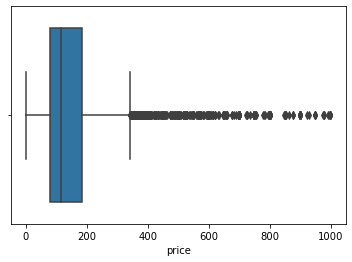

In [6]:
sns.boxplot(x='price', data=airbnb.query('price < 1000'))

# Filter for < 1,000 to avoid outliers

<br>

* An **axes** is returned

* Use `;` to surpress the output <AxesSubplot:xlabel='price'>

<br>

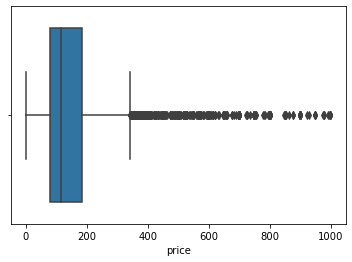

In [7]:
sns.boxplot(x='price', data=airbnb.query('price < 1000'));

<br>

* Assign the axes to a variable, most commonly `ax`
* Retreive the underlying figure with `ax.figure`

> This is done so that we can customize the plot aesthetics by referring to `ax`

<br>

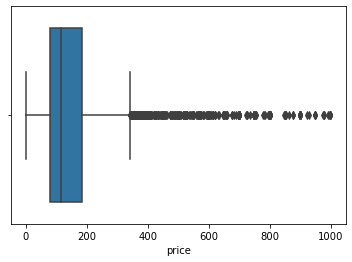

In [8]:
ax = sns.boxplot(x='price', data=airbnb.query('price < 1000'))

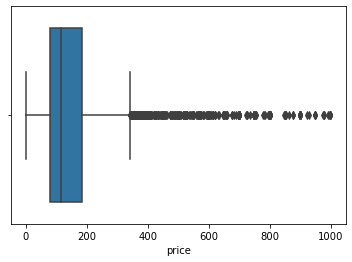

In [9]:
ax.figure

<br>

### Plot Aesthetics

* Default plot settings not aesthetically pleasing
* To adjust aesthetics of all future plots, use `sns.set_theme` function
    * `style` - white, dark, whitegrid, darkgrid, ticks
    * `rc` - matplotlib run configuration parameters
        * Find values under plt.rcParams
        * Use dictionary; e.g. `{'figure.figsize': [11.0, 4.0]`
        * Scale font with `font_scale`

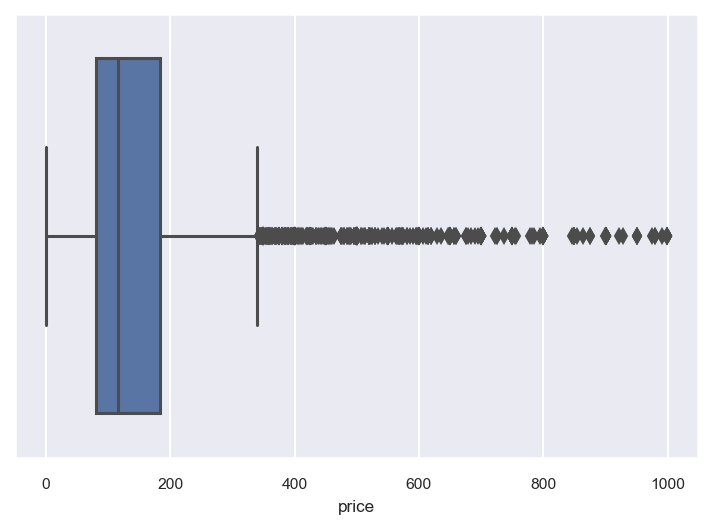

In [35]:
sns.set_theme(style='darkgrid',
              font_scale=0.7,
              rc={'figure.dpi': 147})

sns.boxplot(x='price', data=airbnb.query('price < 1000'));

<br>

You can also choose to adjust axes plot sizes individually as you create them:
* You must create figure and axes before hand with `fig, ax = plt.subplots(figsize=(w, h))
* Then set `ax` parameter in a plotting function - e.g. `sns.boxplot(..., ax=ax)

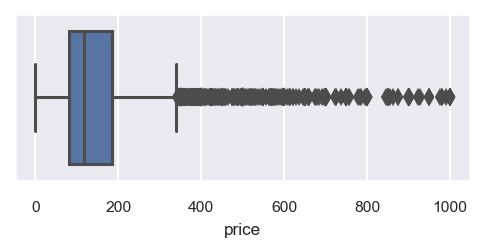

In [11]:
fig, ax = plt.subplots(figsize=(4, 1.5))
sns.boxplot(x='price', data=airbnb.query('price < 1000'), ax=ax);

<br>

Let's try a vertical boxplot; use `y` instead of `x`

<br>

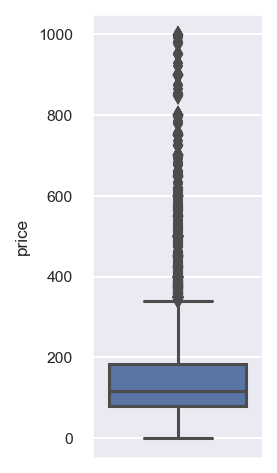

In [12]:
fig, ax = plt.subplots(figsize=(1.5, 4))
sns.boxplot(y='price', data=airbnb.query('price < 1000'), ax=ax);

<br>

### Matplotlib vs Seaborn

Let's re-create the above plot using Matplotlib

<br>

#### Matplotlib

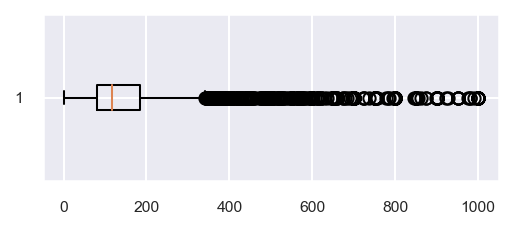

In [13]:
fig, ax = plt.subplots(figsize=(4, 1.5))
ax.boxplot(x='price', data=airbnb.query('price < 1000'), vert=False);

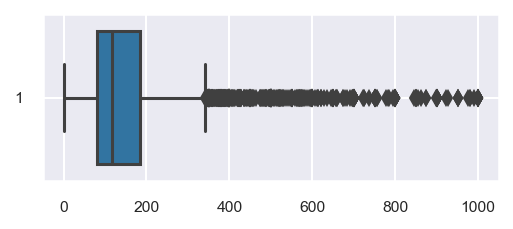

In [14]:
fig, ax = plt.subplots(figsize=(4, 1.5))
ax.boxplot(x='price', data=airbnb.query('price < 1000'), 
           widths=.8, vert=False, patch_artist=True,
           medianprops={'color': '.25', 'lw': 1.5},
           boxprops={'ec': '.25', 'lw': 1.5, 'fc': '#3274a1'},
           whiskerprops={'color': '.25', 'lw': 1.5}, 
           capprops={'color': '.25', 'lw': 1.5},
           flierprops={'marker': 'd', 'mfc': '.25', 'mec': '.25', 'ms': 5});

<br>

#### Seaborn

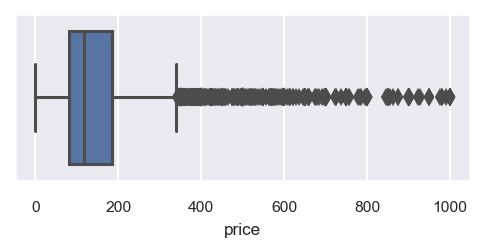

In [15]:
fig, ax = plt.subplots(figsize=(4, 1.5))
sns.boxplot(x='price', data=airbnb.query('price < 1000'), ax=ax);

<br><br>

# Section 03: Different Axes Plots

## Histogram

Let's play around with histograms and their parameters:

* `bins` - number of bins to use, default 'auto'
* `binrange` - (left, right)
* `binwidth` - width of bin - cannot be used with `bins`
* `stat` - type of statistic to show - defaults to raw count - 'count', 'frequency', 'density', 'probability', 'percent'
* `cumulative` - bool continuously adds 
* `element` - 'bar', 'step', 'poly' - type of line to draw
* `fill` - boolean whether or not to fill with color
* `kde` - compute a kernel density estimate to smooth the distribution
* `kwargs` - extra keyword arguments forwarded to `plt.bar`
    * `ec` - edgecolor
    * `lw` - linewidth
    * `alpha` - color opacity

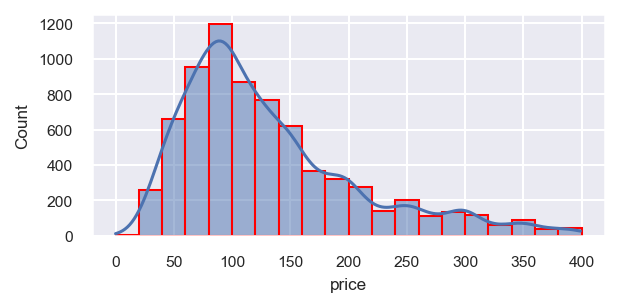

In [16]:
# 
fig, ax = plt.subplots(figsize=(4.5, 2))
sns.histplot(x='price', 
             data=airbnb.query('price < 400'), 
             binrange=(0, 400), 
             binwidth=20, 
             ax=ax, 
             cumulative=False,
             element='bars', 
             stat='count',
             kde=True,
             # These arguments are passed to plt.bar (Matplotlib)
             ec='red', 
             lw=1);

<br>

## Bivariate Boxplot

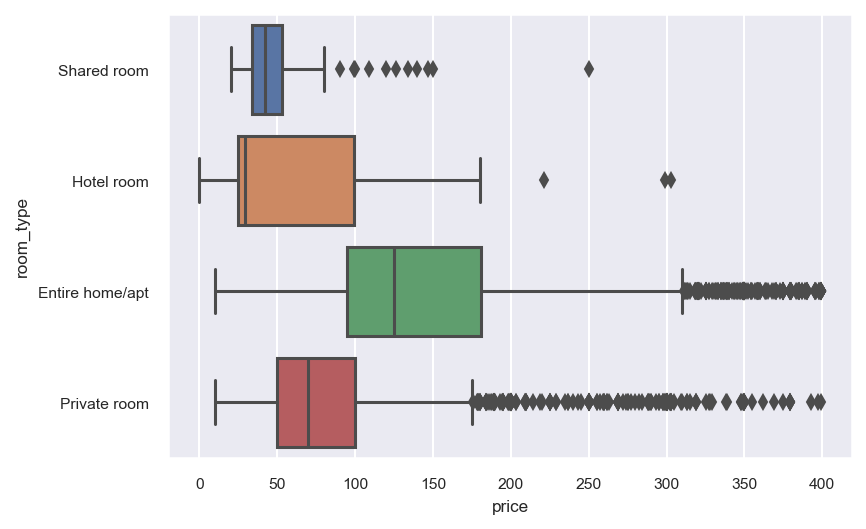

In [36]:
#
fig, ax = plt.subplots()
sns.boxplot(x='price',
            y='room_type', 
            data=airbnb.query('price < 400'), 
            order=['Shared room', 'Hotel room', 
                   'Entire home/apt', 'Private room']);

<br>

## Multivariate Boxplot

Grouping within groups with `hue`:

* `hue` is second grouping column
* `hue_order` - specific order for hue categories

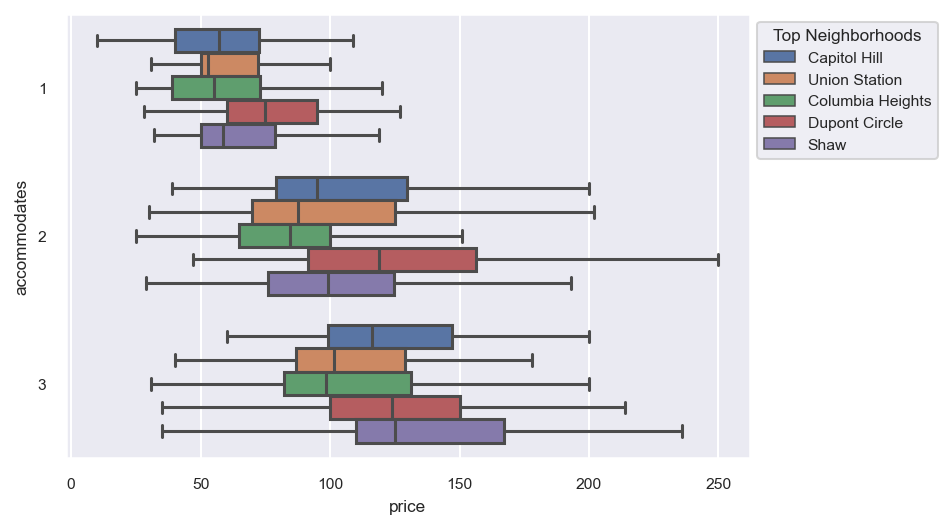

In [18]:
# 
top5 = airbnb['neighborhood'].value_counts().index[:5]
top5


fig, ax = plt.subplots()
ax = sns.boxplot(x='price', 
                 y='accommodates', 
                 hue='neighborhood', 
                 hue_order=top5,
                 data=airbnb.query('price < 400'), 
                 orient='h', 
                 order=[1, 2, 3], 
                 showfliers=False)

ax.legend(bbox_to_anchor=(1, 1), 
          title='Top Neighborhoods', 
          loc='upper left');

<br>

# Section 04: Aesthetic Customizations

<br>

Seaborn helps us build pretty plots without the heavy lifting that we'd normally do using Matplotlib (as we've seen above in Section 02). However, if we'd like to customize our plots with specific annotations, that will require the use of Matplotlib (as we'll see below)

<br>

## Barplot

* You can override the initial Seaborn style by using `with sns.axes_style("___"):`
* You can also annotate the plot and axes, but this requires matplotlib

Variables:
* `Price`
* `Accommodates`
* `Type of Room`

/var/folders/1_/n1j7wjy12xnb957m3n6fks280000gn/T/ipykernel_20119/3184761228.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


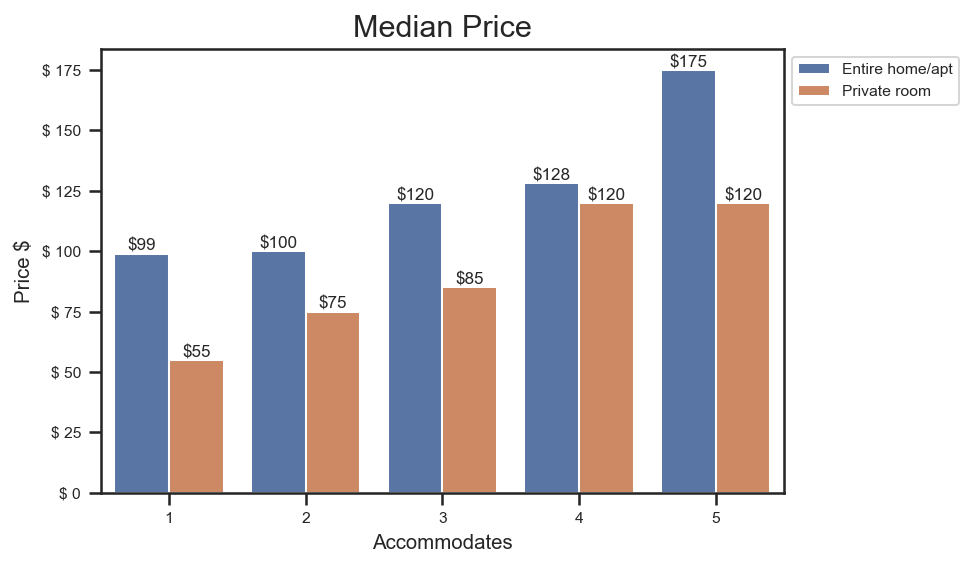

In [37]:
# Pull the top 2 types of rooms by count
top2 = airbnb['room_type'].value_counts().index[:2]


# You can also override the seaborn style you set initially with:

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    ax = sns.barplot(x='accommodates', 
                     y='price', 
                     order=[1, 2, 3, 4, 5],
                     data=airbnb, 
                     ax=ax, 
                     ci=None,
                     estimator=np.median, 
                     hue='room_type', hue_order=top2,
                    )

    # Add the dollar sign to price values on y-axes
    ylabels = ["$ "+ '{:,.0f}'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

    # Annotate plot with values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y          = p.get_xy()
        ax.text(x+width/2,
                y+height+3,
                "$" + '{:,.0f}'.format(height),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_title('Median Price', fontsize=15)
    ax.set_xlabel('Accommodates', fontsize=10)
    ax.set_ylabel('Price $', fontsize=10)

<br><br>

## Lineplot

Let's look at new deaths overtime for New England states between Nov & Dec 2021

<br>

In [26]:
##############################################################################################################################
# Data: United States COVID-19 Cases and Deaths by State over Time
# Source: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
#############################################################################################################################
from sodapy import Socrata

client = Socrata("data.cdc.gov", None)

results = client.get("9mfq-cb36", limit=100_000)

covid = pd.DataFrame.from_records(results)
print(f"""

Number of rows: {covid.shape[0]}
Number of columns: {covid.shape[1]}

""")
covid.sample(n=5)



Number of rows: 43440
Number of columns: 15




,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death
18149,2020-11-17T00:00:00.000,LA,207685,NaN,NaN,2626.0,434,6156,17.0,3,2020-11-18T14:57:46.366,Not agree,Agree,5916.0,240
15272,2020-12-18T00:00:00.000,ND,89788,87420.0,2368,231.0,38,1231,6.0,0,2020-12-19T14:42:31.925,Agree,Not agree,NaN,NaN
9428,2021-10-11T00:00:00.000,DE,137958,126555.0,11403,359.0,8,1997,0.0,0,2021-10-12T14:00:10.316,Agree,Agree,1830.0,167
39586,2020-07-28T00:00:00.000,WV,6173,6033.0,140,119.0,-1,111,5.0,0,2020-07-29T14:34:46.946,Agree,Not agree,NaN,NaN
20904,2020-02-18T00:00:00.000,FSM,0,NaN,NaN,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree,NaN,NaN


<br><br><br>

In [27]:
# Change column types to properly visualize them
covid['submission_date'] =  pd.to_datetime(covid['submission_date'])
covid['new_death'] = pd.to_numeric(covid['new_death'])

<br><br><br>

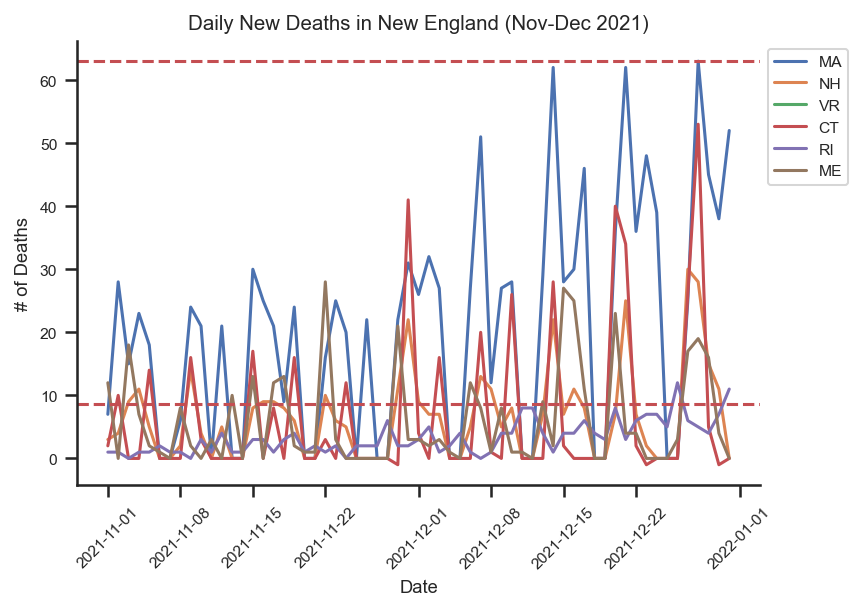

In [28]:
# Filter for New England states
new_england = ['MA', 'NH', 'VR', 'CT', 'RI', 'ME']

# Filter for Nov & Dec 2021
covid_filtered = covid[
    (covid['submission_date'].dt.month.isin([11,12])) & 
    (covid['submission_date'].dt.year == 2021)]


with sns.axes_style("ticks"):
    # Plot new deaths
    fig, ax = plt.subplots()
    sns.lineplot(x='submission_date',
                 y='new_death', 
                 data=covid_filtered, 
                 ci=None, 
                 estimator='mean',
                 hue='state', 
                 hue_order=new_england);
    
    # Mark max & middle level of deaths
    ax.axhline(y=covid_filtered.loc[
        covid_filtered['state'].isin(new_england), 'new_death'].max(),
               color = 'r',
               ls  = '--')
    ax.axhline(y=covid_filtered.loc[
        covid_filtered['state'].isin(new_england), 'new_death'].mean(),
               color = 'r',
               ls  = '--')
    
    # Rotate x-axis labels due to overlap of dates
    ax.tick_params(axis='x', rotation=45)
    
    # Remove top and right spine
    sns.despine()
    
    # Anchor legend outside the plot
    ax.legend(bbox_to_anchor=(1, 1))
    
    # Set axes title & labels
    ax.set_title('Daily New Deaths in New England (Nov-Dec 2021)', fontsize=10)
    ax.set_xlabel('Date', fontsize=9)
    ax.set_ylabel('# of Deaths', fontsize=9)

<br><br>

Lots of days have null values because reporting doesn't occur every day. Therefore, let's aggregate our data to a weekly basis and visualize that instead

<br><br>

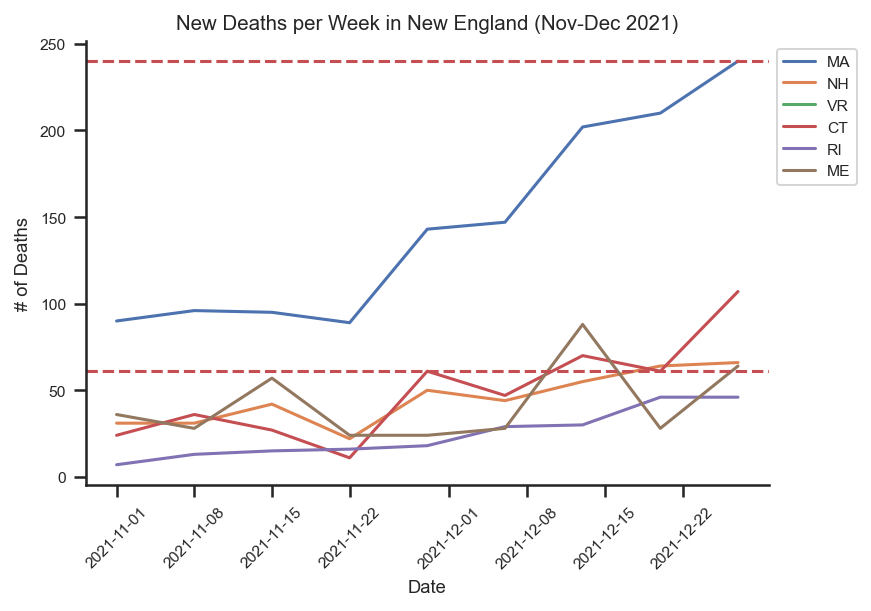

In [29]:
# Subtract one week so we begin calculation one week ahead not before
covid['submission_date'] = covid['submission_date'] - pd.to_timedelta(7,
                                                                      unit='d')

# Group data based on state and date with a frequency of weeks starting Monday
covid_filtered_02 = covid.groupby([
    'state', pd.Grouper(key='submission_date', freq='W-MON')
    ])['new_death'] \
    .sum().reset_index().sort_values('submission_date')

# Filter for date
covid_filtered_02 = covid_filtered_02[
    (covid_filtered_02['submission_date'].dt.month.isin([11, 12]))
    & (covid_filtered_02['submission_date'].dt.year == 2021)]

with sns.axes_style("ticks"):
    # Plot new deaths
    fig, ax = plt.subplots()

    sns.lineplot(x='submission_date',
                 y='new_death',
                 data=covid_filtered_02,
                 ci=None,
                 estimator='mean',
                 hue='state',
                 hue_order=new_england)

    # Mark max & middle level of deaths
    ax.axhline(
        y=covid_filtered_02.loc[covid_filtered_02['state'].isin(new_england),
                                'new_death'].max(),
        color='r',
        ls='--')
    ax.axhline(
        y=covid_filtered_02.loc[covid_filtered_02['state'].isin(new_england),
                                'new_death'].mean(),
        color='r',
        ls='--')
    
    # Rotate x-axis labels due to overlap of dates
    ax.tick_params(axis='x', rotation=45)

    # Remove top and right spine
    sns.despine()

    # Anchor legend outside the plot
    ax.legend(bbox_to_anchor=(1, 1))

    # Set axes title & labels
    ax.set_title('New Deaths per Week in New England (Nov-Dec 2021)',
                 fontsize=10)
    ax.set_xlabel('Date', fontsize=9)
    ax.set_ylabel('# of Deaths', fontsize=9);

<br>

## Scatterplot

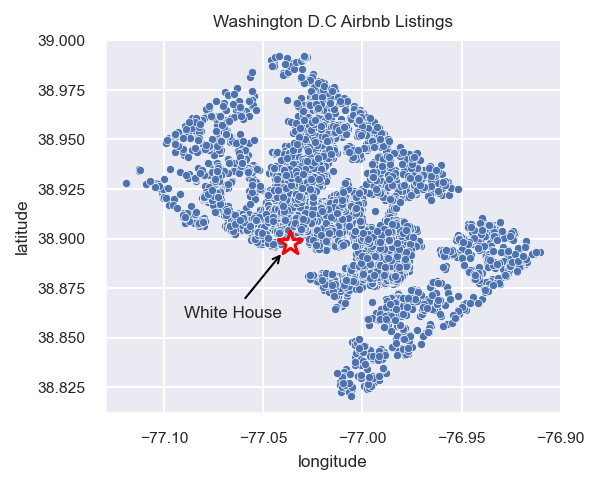

In [20]:
# White House coordinates
wh_coords = -77.0365, 38.8977

fig, ax = plt.subplots(figsize=(4, 4))

# Set aspect ratio x/y to equal
ax.set_aspect('equal')

# Plot scatterplot
sns.scatterplot(x='longitude', y='latitude', data=airbnb, s=16, ax=ax)

# For some customization, we have to use Matplotlib, not Seaborn
ax.scatter(*wh_coords, marker='*', c='white', ec='red', lw=1.5, s=150)
ax.annotate('White House', xy=wh_coords, xytext=(-77.09, 38.86), 
            arrowprops={'arrowstyle': '->', 'shrinkB': 7, 'color': 'black'})
ax.set_title('Washington D.C Airbnb Listings');

<br>

Let's make it more interesting and highlight every listing that's within 1 mile from the whitehouse

<br>

In [21]:
# Step 1, calculate Euclidean distance using Pythagorean theorom
dist_degree = ((airbnb['longitude'] - wh_coords[0]) ** 2 + 
               (airbnb['latitude'] - wh_coords[1]) ** 2) ** .5
dist_degree.head(3)

0    0.058685
1    0.034975
2    0.092171
dtype: float64

<br><br>

In [22]:
# Step 2, find approximate miles per degree
# Circumfurence of equator is ~25k miles and there are 360 degrees in a circle
miles_per_degree = 25000 / 360
miles_per_degree

69.44444444444444

<br><br>

In [23]:
# Step 3, calculate miles from whitehouse
airbnb['miles_from_wh'] = (dist_degree * miles_per_degree).round(2)
airbnb['miles_from_wh'].head(3)

0    4.08
1    2.43
2    6.40
Name: miles_from_wh, dtype: float64

<br><br>

In [24]:
# Step 4, create a flag for whether or not a listing is near the whitehouse
airbnb['near_whitehouse'] = airbnb['miles_from_wh'] < 1
airbnb.sample(n=3)

,id,neighborhood,room_type,accommodates,bedrooms,price,security_deposit,cleaning_fee,rating,superhost,...,acceptance_rate,host_since,last_review,num_reviews,latitude,longitude,minimum_nights,maximum_nights,miles_from_wh,near_whitehouse
2498,18395036,Shaw,Private room,2,1.0,104,100,0,4.82,0,...,88%,2017-04-24,2021-08-29,151,38.91142,-77.02558,3,21,1.22,False
5115,39421613,Columbia Heights,Entire home/apt,10,4.0,800,100,100,NaN,1,...,99%,2016-06-16,NaN,0,38.92769,-77.02150,5,90,2.33,False
3839,27812605,Dupont Circle,Entire home/apt,4,2.0,196,0,50,4.55,1,...,NaN,2011-04-06,2021-08-22,88,38.91142,-77.04789,30,1000,1.24,False


<br><br>

Now we can re-plot the scatterplot but with out flag as the `hue`

<br><br>

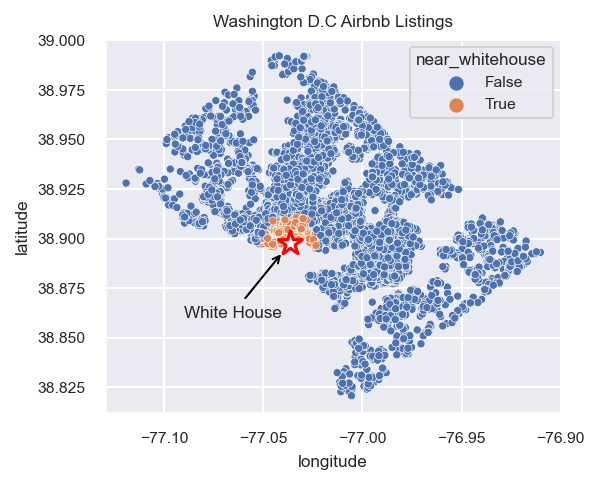

In [25]:
fig, ax = plt.subplots(figsize=(4, 4))

# Set aspect ratio x/y to equal
ax.set_aspect('equal')

# Plot scatterplot
sns.scatterplot(x='longitude', y='latitude', data=airbnb, s=16, ax=ax,
               hue='near_whitehouse')

# For some customization, we have to use Matplotlib, not Seaborn
ax.scatter(*wh_coords, marker='*', c='white', ec='red', lw=1.5, s=150,)
ax.annotate('White House', xy=wh_coords, xytext=(-77.09, 38.86), 
            arrowprops={'arrowstyle': '->', 'shrinkB': 7, 'color': 'black'})
ax.set_title('Washington D.C Airbnb Listings');

<br><br><br><br><br><br><br><br>

# Appendix: Grid Plots


> How to use Grid Plots
> 
> * Use one of `relplot`, `displot`, `catplot`, or `lmplot`
> * Set `kind` to the underlying Axes plot ("scatter", "line", "hist", "kde", "bar", "count", "box", "violin")
> * Set `row` or `col` (or both) to a categorical column
> * Set `col_wrap` to an integer to wrap the plots when only using `col` and not `row`
> * Filter and set specific order with `row_order`, `col_order`
> * No need to use a grid plot when creating a single Axes
> * Use `height` and `aspect` to control height and width of each individual Axes
>     * `height` is in figure inches of a single Axes
>     * `aspect` is multiplied by `height` to get width of a single Axes
> * Additional keyword arguments are forwarded to the underlying Axes plotting function

<br>

## Catplot

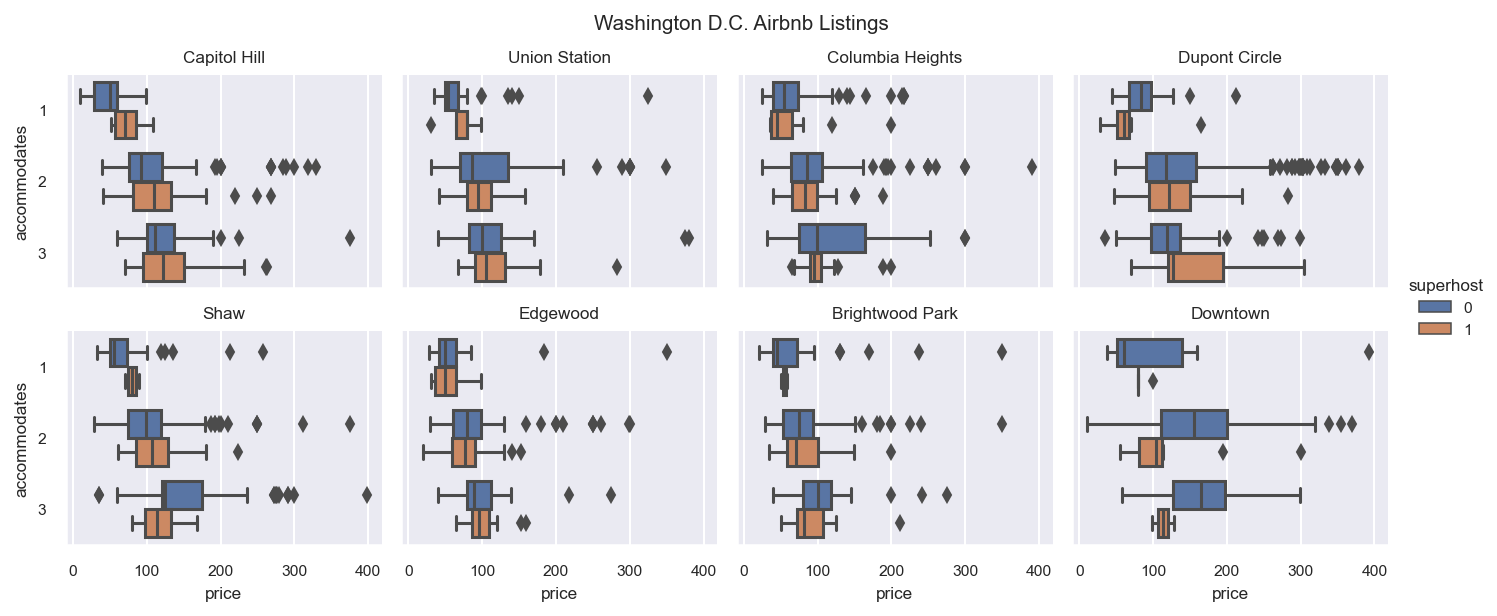

In [30]:
# Top 8 neighborhoods based on count
top8 = airbnb['neighborhood'].value_counts().index[:8]

# Filter data to avoid outliers
data = airbnb.query('price < 400')

# Instantiate grid
grid = sns.catplot(x='price', 
                   y='accommodates', 
                   data=data, 
                   kind='box', 
                   orient='h',
                   order=[1, 2, 3],
                   col='neighborhood',
                   col_order=top8, 
                   col_wrap=4,
                   hue='superhost',
                   height=2, 
                   aspect=1.2)

# Set Grid & Axes titles
grid.figure.suptitle('Washington D.C. Airbnb Listings', y=1.03)
grid.set_titles('{col_name}');